##  Hospitality marketplace dataset EDA

### Questions that need to be answered :- 
-What are guests searching for in the city?

-Which inquiries do hosts tend to accept

-What gaps exist between guest demand and host supply

-Any other information that deepens the understanding of the data

## Datasets

There are 2 datasets from AirBnB:

- **searches.tsv**: Contains a row for each set of searches that a user does for a city
- **contacts.tsv**: Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in the city.

### Searches Dataset

The searches dataset contains the following columns:

- **ds**: Date of the search.
- **id_user**: Alphanumeric user_id.
- **ds_checkin**: Date stamp of the check-in date of the search.
- **ds_checkout**: Date stamp of the check-out date of the search.
- **n_searches**: Number of searches in the search set.
- **n_nights**: The number of nights the search was for.
- **n_guests_min**: The minimum number of guests selected in a search set.
- **n_guests_max**: The maximum number of guests selected in a search set.
- **origin_country**: The country the search was from.
- **filter_price_min**: The value of the lower bound of the price filter, if the user used it.
- **filter_price_max**: The value of the upper bound of the price filter, if the user used it.
- **filter_room_types**: The room types that the user filtered by, if the user used the room_types filter.
- **filter_neighborhoods**: The neighborhoods types that the user filtered by, if the user used the neighborhoods filter.

### Contacts Dataset

The contacts dataset contains the following columns:

- **id_guest**: Alphanumeric user_id of the guest making the inquiry.
- **id_host**: Alphanumeric user_id of the host of the listing to which the inquiry is made.
- **id_listing**: Alphanumeric identifier for the listing to which the inquiry is made.
- **ts_contact_at**: UTC timestamp of the moment the inquiry is made.
- **ts_reply_at**: UTC timestamp of the moment the host replies to the inquiry, if so.
- **ts_accepted_at**: UTC timestamp of the moment the host accepts the inquiry, if so.
- **ts_booking_at**: UTC timestamp of the moment the booking is made, if so.
- **ds_checkin**: Date stamp of the check-in date of the inquiry.
- **ds_checkout**: Date stamp of the check-out date of the inquiry.
- **n_guests**: The number of guests the inquiry is for.
- **n_messages**: The total number of messages that were sent around this inquiry.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip show numpy
!pip show pandas
!pip show matplotlib

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: D:\anaconda3\envs\anlp\Lib\site-packages
Requires: 
Required-by: blis, Bottleneck, contourpy, gensim, matplotlib, mkl-fft, mkl-random, numexpr, pandas, scikit-learn, scipy, seaborn, spacy, thinc
Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above c

### "Contacts" Dataset

Will help us in answering "Which inquiries do hosts tend to accept"

In [3]:
# Define the path to the TSV file
file_path = 'datasets/contacts.tsv'  

# Use pandas to read the CSV file into a DataFrame
df_contacts = pd.read_csv(file_path,delimiter='\t')

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df_contacts.head()


,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [4]:
df_contacts.shape

(7823, 11)

In [5]:
df_contacts.columns

Index(['id_guest', 'id_host', 'id_listing', 'ts_contact_at', 'ts_reply_at',
       'ts_accepted_at', 'ts_booking_at', 'ds_checkin', 'ds_checkout',
       'n_guests', 'n_messages'],
      dtype='object')

In [6]:
df_contacts.dtypes

id_guest          object
id_host           object
id_listing        object
ts_contact_at     object
ts_reply_at       object
ts_accepted_at    object
ts_booking_at     object
ds_checkin        object
ds_checkout       object
n_guests           int64
n_messages         int64
dtype: object

In [7]:
df_contacts['ts_reply_at']=pd.to_datetime(df_contacts['ts_reply_at'])
df_contacts['ts_accepted_at']=pd.to_datetime(df_contacts['ts_accepted_at'])
df_contacts['ts_contact_at']=pd.to_datetime(df_contacts['ts_contact_at'])
df_contacts['ts_booking_at']=pd.to_datetime(df_contacts['ts_booking_at'])
df_contacts['ds_checkin']=pd.to_datetime(df_contacts['ds_checkin'])
df_contacts['ds_checkout']=pd.to_datetime(df_contacts['ds_checkout'])




In [8]:
# we need to now undestand the acceptance of requests
df_contacts['ts_accepted_at'].head()
#there is nearly more than half of NaN values
#Nan is non acceptance and rest is accepted 
df_contacts['req_accepted'] = np.where(np.isnan(df_contacts['ts_accepted_at']), False, True)

In [9]:
df_contacts.nunique()

id_guest          3283
id_host           1184
id_listing        1542
ts_contact_at     7805
ts_reply_at       7207
ts_accepted_at    3627
ts_booking_at     2174
ds_checkin         241
ds_checkout        256
n_guests            15
n_messages          54
req_accepted         2
dtype: int64

In [10]:
df_contacts.isna().sum()

id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
req_accepted         0
dtype: int64

In [11]:
# Calculate the percentage of rows with NaN values in each column
percentage_nan = (df_contacts.isna().mean() * 100).round(2)

# Create a new DataFrame with column names as the index
percentage_nan_df = pd.DataFrame({'Percentage of NaN': percentage_nan})

# Print the DataFrame with column names as the index
print(percentage_nan_df)

                Percentage of NaN
id_guest                     0.00
id_host                      0.00
id_listing                   0.00
ts_contact_at                0.00
ts_reply_at                  7.72
ts_accepted_at              53.64
ts_booking_at               72.21
ds_checkin                   0.00
ds_checkout                  0.00
n_guests                     0.00
n_messages                   0.00
req_accepted                 0.00


In [12]:
#Skewness of a dataset needs to be identified to carry out normalization

display(df_contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests        2.441468
n_messages      3.696440
req_accepted    0.145883
dtype: float64

In [13]:
#find the number of cases where the number of guests were more than 10
print(len(df_contacts[(df_contacts["n_guests"]>=10) & (df_contacts["req_accepted"]==True)])/len(df_contacts))

0.00204525118241084


In [14]:
#find the number of cases where the number of guests were more than 5
print(len(df_contacts[(df_contacts["n_guests"]>=5) & (df_contacts["req_accepted"]==True)])/len(df_contacts))

0.04205547743832289


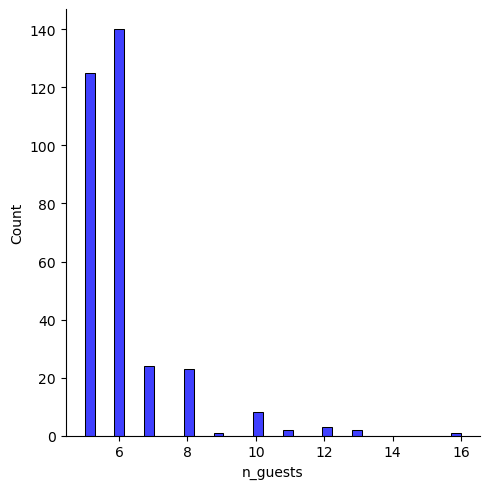

In [15]:
# Plotting the distribution of the number of guests for number >=5

guest_distri_accepted=df_contacts[(df_contacts["n_guests"]>=5) & (df_contacts["req_accepted"]==True)]
sns.displot(x=guest_distri_accepted["n_guests"], color = 'blue')
plt.show()

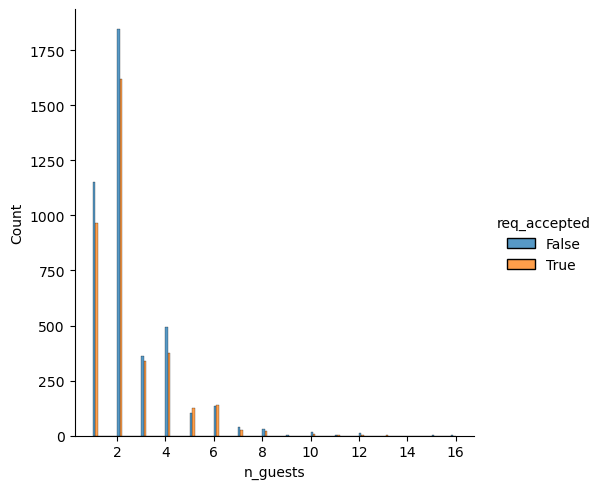

In [16]:
# Plotting the distribution of the number of guests accepted vs rejected

guest_distri=df_contacts[["n_guests",'req_accepted']]
sns.displot(guest_distri,x="n_guests", hue = 'req_accepted', multiple="dodge")
plt.show()

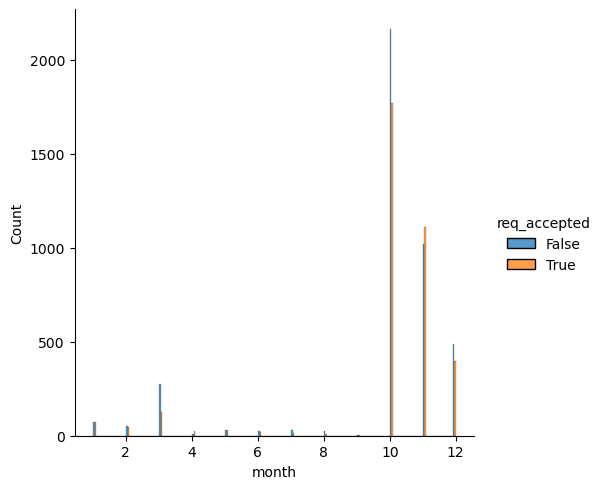

In [17]:
# Let us check if guests get rejected more on specific months 
df_contacts["month"]=df_contacts['ds_checkin'].dt.month
sns.displot(df_contacts,x="month", hue = 'req_accepted', multiple="dodge")
plt.show()

In [18]:
table = df_contacts.groupby(['month', 'req_accepted']).size().unstack(fill_value=0)
table.rename(columns={True: 'True_col', False: 'False_col'}, inplace=True)

table["more_acceptance"]= table['True_col'] > table['False_col']
print(table["more_acceptance"])

month
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11     True
12    False
Name: more_acceptance, dtype: bool


We can see that for the months 4,5 and 11, the hosts tend to accept more requests than reject them.

### "Searches" Dataset

In [19]:
# Define the path to the TSV file
file_path = 'datasets/searches.tsv'  

# Use pandas to read the CSV file into a DataFrame
df_searches = pd.read_csv(file_path,delimiter='\t')

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df_searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [20]:
df_searches.shape

(35737, 13)

In [21]:
df_searches.columns

Index(['ds', 'id_user', 'ds_checkin', 'ds_checkout', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'filter_neighborhoods'],
      dtype='object')

In [22]:
df_searches.dtypes

ds                       object
id_user                  object
ds_checkin               object
ds_checkout              object
n_searches                int64
n_nights                float64
n_guests_min              int64
n_guests_max              int64
origin_country           object
filter_price_min        float64
filter_price_max        float64
filter_room_types        object
filter_neighborhoods     object
dtype: object

In [23]:
df_searches.nunique()

ds                         14
id_user                 18605
ds_checkin                385
ds_checkout               422
n_searches                211
n_nights                  207
n_guests_min               16
n_guests_max               16
origin_country            131
filter_price_min          268
filter_price_max          929
filter_room_types         160
filter_neighborhoods      270
dtype: int64

In [24]:
sorted(df_searches['n_guests_min'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [25]:
df_searches['ds'].unique()

array(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
       '2014-10-05', '2014-10-06', '2014-10-07', '2014-10-08',
       '2014-10-09', '2014-10-10', '2014-10-11', '2014-10-12',
       '2014-10-13', '2014-10-14'], dtype=object)

In [26]:
# "ds" field needs to be converted to datetime format for insightful analysis
df_searches['ds'] = pd.to_datetime(df_searches['ds'])
df_searches['ds_checkin'] = pd.to_datetime(df_searches['ds_checkin'])
df_searches['ds_checkout'] = pd.to_datetime(df_searches['ds_checkout'])

#let us now find out the time available for hosts to prepare for the guests
df_searches['prep_days_gap']=df_searches['ds_checkin'] - df_searches['ds']
df_searches['month']=df_searches['ds'].dt.month

In [27]:
sorted(df_searches['n_guests_max'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [28]:
# Calculate the percentage of rows with NaN values in each column
percentage_nan = (df_searches.isna().mean() * 100).round(2)

# Create a new DataFrame with column names as the index
percentage_nan_df = pd.DataFrame({'Percentage of NaN': percentage_nan})

# Print the DataFrame with column names as the index
print(percentage_nan_df)

                      Percentage of NaN
ds                                 0.00
id_user                            0.00
ds_checkin                        33.16
ds_checkout                       33.16
n_searches                         0.00
n_nights                          33.16
n_guests_min                       0.00
n_guests_max                       0.00
origin_country                     0.00
filter_price_min                  62.72
filter_price_max                  62.72
filter_room_types                 54.69
filter_neighborhoods              96.23
prep_days_gap                     33.16
month                              0.00


The filter_neighborhoods column with a high NaN value percentage may complicate calculations and need to be dropped.


In [29]:
df_searches = df_searches.drop(columns=['filter_neighborhoods'])

We can see that two columns are having the same NaN% value, filter_price_min & filter_price_max at 62.72. 
I will check if NaN is found simultaneously for a row.

In [30]:
multi_col_nan=df_searches['filter_price_min'].isna() & df_searches['filter_price_max'].isna()
multi_col_nan.sum()
print(f"Percentage of rows with both cols having NaN is {multi_col_nan.sum()/len(df_searches):.3f}")

Percentage of rows with both cols having NaN is 0.627


So this raises the possibility that the user was not interested in assigning filter values for maximum and minum prices.

We need to replicate this check with the columns ds_checkin,ds_checkout and n_nights . Since all three have the same percentage of NaN values.
First, we check the combination of ds_checkin and ds_checkout

In [31]:
multi_col_nan=df_searches['ds_checkin'].isna() & df_searches['ds_checkout'].isna()
multi_col_nan.sum()
print(f"Percentage of rows with both cols having NaN is {multi_col_nan.sum()/len(df_searches):.4f}")

Percentage of rows with both cols having NaN is 0.3316


Now we will check the combination ofthe three cols namely ds_checkin,ds_checkout and n_nights

In [32]:
multi_col_nan=df_searches['ds_checkin'].isna() & df_searches['ds_checkout'].isna() & df_searches['n_nights'].isna() 
print(f"Percentage of rows with three cols having NaN is {multi_col_nan.sum()/len(df_searches):.4f}")

Percentage of rows with three cols having NaN is 0.3316


This tells us that the same user decided not to check for ds_checkin,ds_checkout and n_nights. 
We can also extend this to see if the same user decided not to check for filter_price_min & filter_price_max

In [33]:
multi_col_nan=df_searches['ds_checkin'].isna() & df_searches['ds_checkout'].isna() & df_searches['n_nights'].isna() & df_searches['filter_price_min'].isna() & df_searches['filter_price_max'].isna()
multi_col_nan.sum()
print(f"Percentage of rows with five cols having NaN is {multi_col_nan.sum()/len(df_searches):.4f}")

Percentage of rows with five cols having NaN is 0.2815


If NaN value represents a situation when the user did not fillup the value during search, we can now the see that in 28.15% of searches the users did not enter values for ds_checkin,ds_checkout,n_nights, filter_price_min and filter_price_max.

We can drop these rows. 

In [34]:
columns_to_check = ["ds_checkin", "ds_checkout", "n_nights", "filter_price_min", "filter_price_max"]

# Drop rows where all of the specified columns have NaN values
df_searches.dropna(subset=columns_to_check, how="all", inplace=True)

In [35]:
#Normal distribution of the dataset needs to be checked using the .skew() function. Since there are NaN values, these rows will be skipped.
#the skew() function in pandas provides an estimate of the Fisher-Pearson coefficient of skewness for your data, helping you assess the asymmetry of the data distribution.


df_searches.skew(axis = 0, numeric_only = True, skipna = True)

n_searches           6.733477
n_nights             9.942364
n_guests_min         3.087180
n_guests_max         2.831746
filter_price_min    11.087745
filter_price_max     2.999833
month                0.000000
dtype: float64

If the skewness value is greater than 0, it indicates that the data distribution is right-skewed. In a right-skewed distribution, the tail on the right side (the larger values) is longer or fatter than the left tail. This means that the majority of data points are concentrated on the left side, and there are some extremely large values on the right side.

Data transformations, such as logarithmic, square root, or Box-Cox transformations, can make the data distribution closer to normal.

Since most of the columns are numeric in this dataset we can sue the .describe() to determine the key statistical values


In [36]:
df_searches.describe()

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,prep_days_gap,month
count,25677,23888,23888,25677.000000,23888.000000,25677.000000,25677.000000,13322.000000,1.332200e+04,23888,25677.0
mean,2014-10-07 14:40:08.412197632,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,11.214433,7.672765,1.984578,2.398995,8.470200,9.019063e+07,51 days 08:11:53.730743469,10.0
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00,10.0
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,2.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00,10.0
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,6.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00,10.0
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,13.000000,5.000000,2.000000,3.000000,0.000000,3.010000e+02,67 days 00:00:00,10.0
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,431.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00,10.0
std,NaN,NaN,NaN,19.105621,21.557614,1.588265,1.885627,53.987679,2.978482e+08,65 days 18:56:19.491940517,0.0


From the table above we can see that people mostly book for 5 nights or less; number of guests is 1-3; and most people set 0 as the minimum price.

Let us now check the distribution of values searches by users for the different columns.

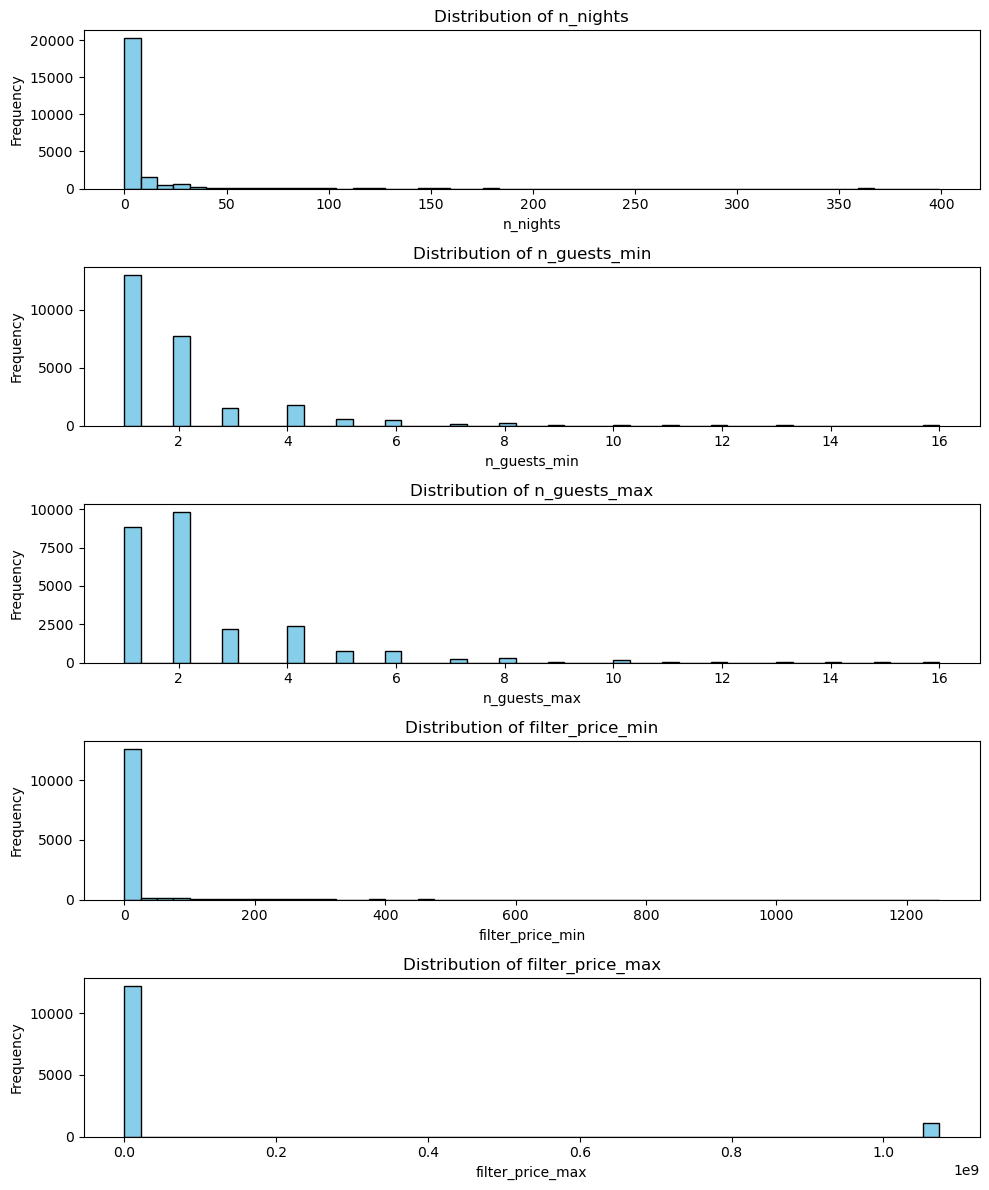

In [37]:
columns_to_plot = ["n_nights", "n_guests_min", "n_guests_max", "filter_price_min", "filter_price_max"]

# Creating subplots for each column
fig = plt.figure(figsize=(10, 12))
axes = [fig.add_subplot(len(columns_to_plot), 1, i+1) for i in range(len(columns_to_plot))]

# Plotting histograms for each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(df_searches[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjusting layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


From the above, we can see that outliers are affecting the dataset. We will now check each column and identify the distribution after removal of outliers

### n_nights The number of nights the search was for.

We first use the Z-score method to identify outliers and display the remaining 

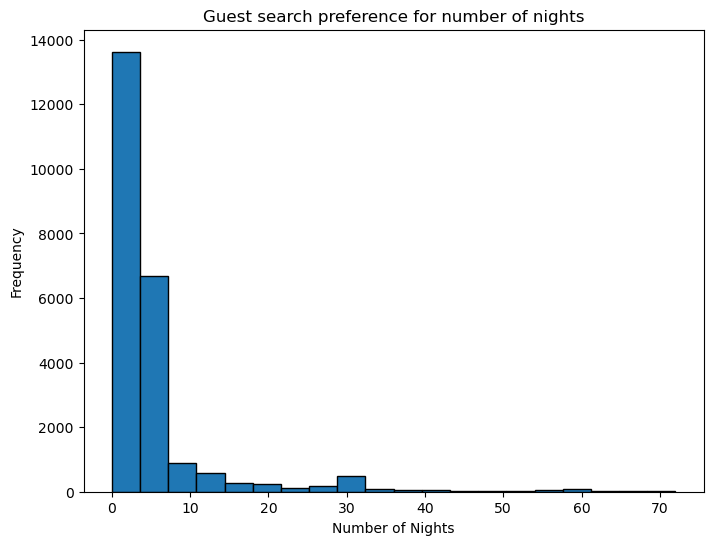

In [38]:
z_scores = np.abs((df_searches['n_nights'] - df_searches['n_nights'].mean()) / df_searches['n_nights'].std())

# We now define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# we then filter the 'n_nights' column to exclude outliers
filtered_nights = df_searches['n_nights'][z_scores <= threshold]

plt.figure(figsize=(8, 6))
plt.hist(filtered_nights, bins=20, edgecolor='k')
plt.xlabel("Number of Nights")
plt.ylabel("Frequency")
plt.title("Guest search preference for number of nights")
plt.show()

We now use the InterQuartile Range method to identify and exclude the outliers from the dataset.

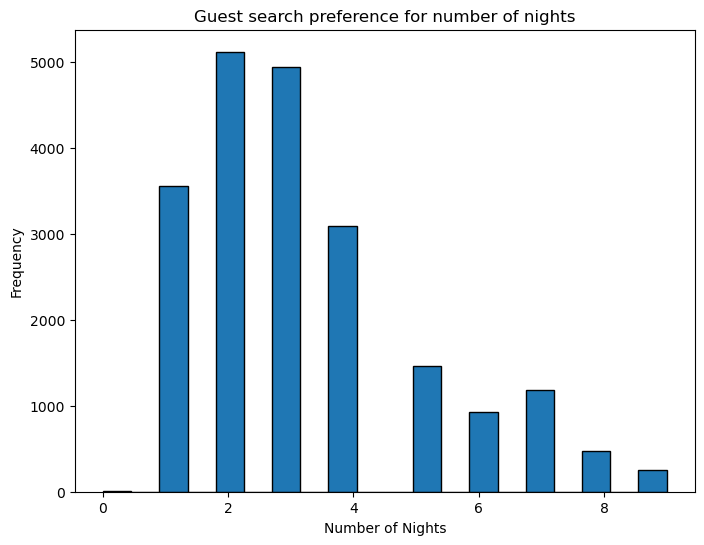

In [39]:
Q1 = df_searches['n_nights'].quantile(0.25)
Q3 = df_searches['n_nights'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_nights = df_searches['n_nights'][(df_searches['n_nights'] >= lower_bound) & (df_searches['n_nights'] <= upper_bound)]

plt.figure(figsize=(8, 6))
plt.hist(filtered_nights, bins=20, edgecolor='k')
plt.xlabel("Number of Nights")
plt.ylabel("Frequency")
plt.title("Guest search preference for number of nights")
plt.show()

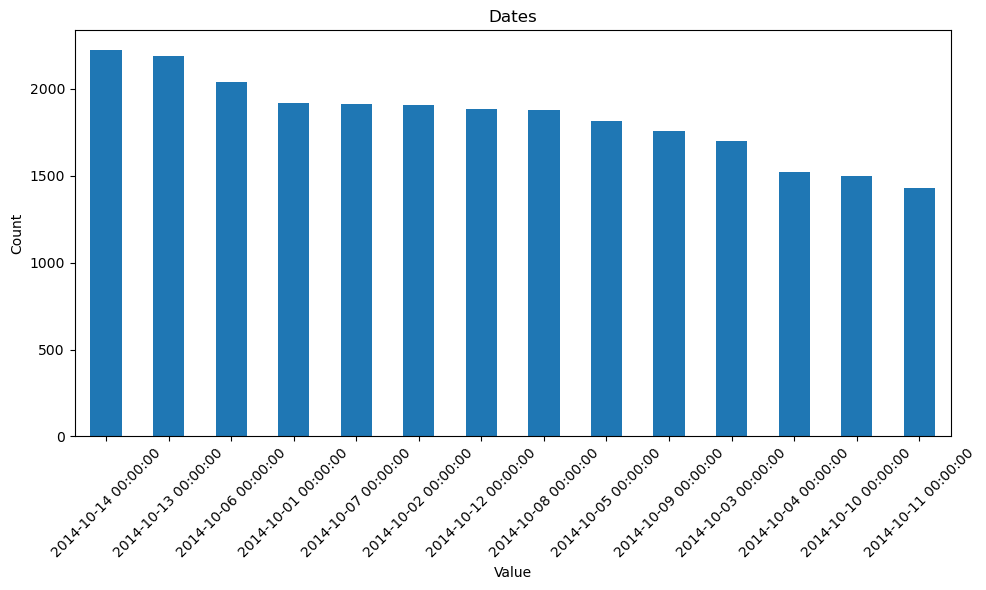

In [40]:
value_counts = df_searches['ds'].value_counts()

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Dates")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

I want to check which days of the week, maximum search happens. 

In [41]:
df_searches['ds'] = pd.to_datetime(df_searches['ds'])
df_searches['day_of_week'] = df_searches['ds'].dt.day_name()

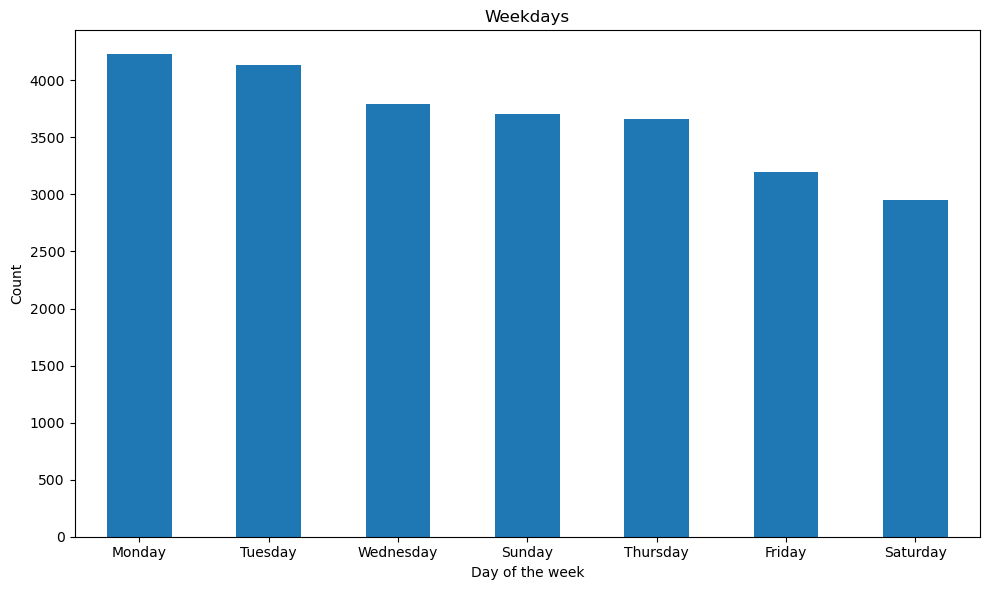

In [42]:
value_counts = df_searches['day_of_week'].value_counts()

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title("Weekdays")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

We can now observe that people tend to search more in the begining of the week

In [43]:
# let us now understand in which all months people want to stay
filtered_df = df_searches.dropna(subset=['month']).copy()
filtered_df['month'] = filtered_df['ds_checkin'].dt.month
# print(filtered_df['month'].unique())
sorted(filtered_df['month'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 11.0, nan, 8.0, 9.0, 12.0]

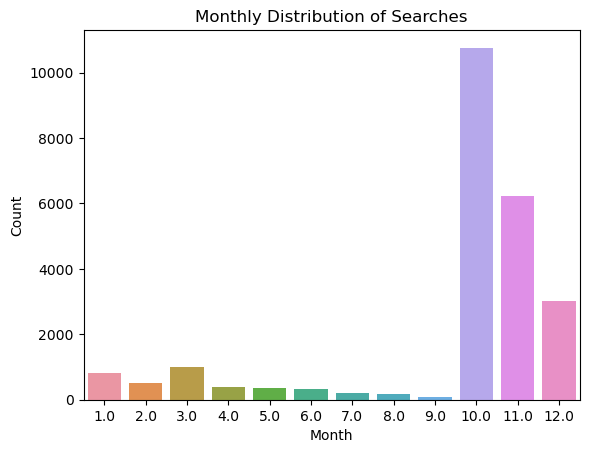

In [44]:
# sns.displot(x=filtered_df['month'], color = 'blue')
sns.countplot(data=filtered_df, x='month')
plt.xlabel('Month')
# plt.xticks(range(1,13), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

plt.ylabel('Count')
plt.title('Monthly Distribution of Searches')

plt.show()

Now, let us check the room types being searched.


In [45]:
df_searches['filter_room_types'].head(20)

0     ,Entire home/apt,Entire home/apt,Private room,...
1                                                   NaN
3                                      ,Entire home/apt
5                                                   NaN
6     Entire home/apt,Entire home/apt,Private room,P...
7                                       Entire home/apt
8                                       Entire home/apt
9                                      ,Entire home/apt
10                                                  NaN
11                                     ,Entire home/apt
13                            ,Shared room,Private room
15                                                  NaN
16    Entire home/apt,Private room,Shared room,Priva...
17                                     ,Entire home/apt
18                                                  NaN
19                                                  NaN
23                                      Entire home/apt
24                                      Entire h

We can see that people are searching for multiple types of accomodation in a single search. 

In [46]:
def split_string_or_nan(s):
    if isinstance(s, str):
        return s.split(",")  
    else:
        return []  # Return an empty list for NaN

# We now apply the custom function to create a new column
df_searches['room_types_list'] = df_searches['filter_room_types'].apply(split_string_or_nan)


In [47]:
df_searches['num_room_types'] = df_searches['room_types_list'].apply(len)

In [48]:
df_searches['num_room_types'].describe()

count    25677.000000
mean         1.178136
std          1.357031
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: num_room_types, dtype: float64

In [49]:
max(df_searches['room_types_list'], key=len)
# we found the longest list, which unofrtunately has large number of duplicates

['',
 'Entire home/apt',
 'Entire home/apt',
 'Private room',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Shared room',
 'Private room',
 'Private room',
 'Shared room',
 'Shared room']

In [50]:
# Remove duplicates and empty spaces from the lists
df_searches['room_types_list'] = df_searches['room_types_list'].apply(lambda x: list(set([item.strip() for item in x if item.strip() != ""])))


In [51]:
max(df_searches['room_types_list'], key=len)

['Private room', 'Shared room', 'Entire home/apt']

In [52]:
room_type_dict={}
for listroom in df_searches['room_types_list']:
    for roomtype in listroom:
        if roomtype in room_type_dict:
            room_type_dict[roomtype]+=1
        else:
             room_type_dict[roomtype]=1
        

In [53]:
print(room_type_dict)

{'Private room': 5594, 'Entire home/apt': 11750, 'Shared room': 858}


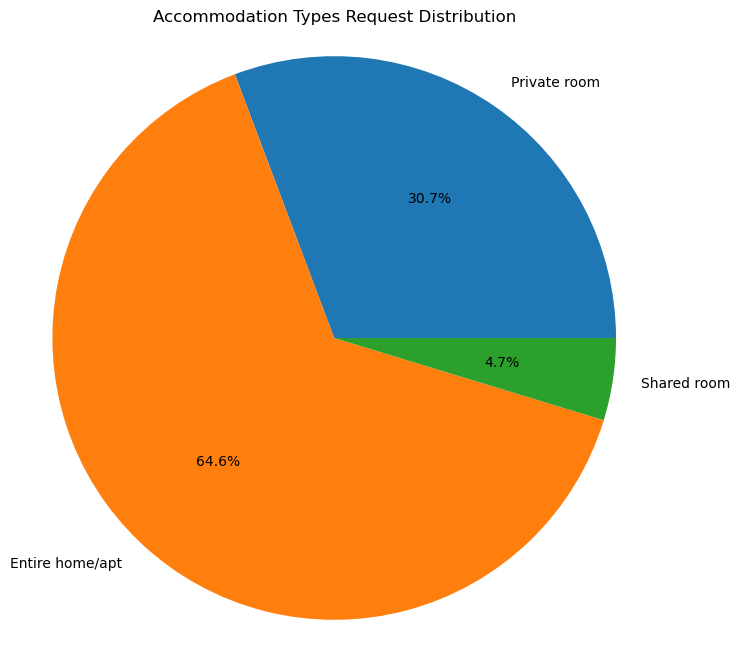

In [54]:
accommodation_types = list(room_type_dict.keys())
count_values = list(room_type_dict.values())

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_values, labels=accommodation_types, autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a title
plt.title('Accommodation Types Request Distribution')

# Showing the plot
plt.show()

## Studying the filter_price_max of df_searches

In [55]:
## Studying the filter_price_max of df_searches

# Let us find out in how many searches the filter_price_max was above 500

print(len(df_searches[df_searches['filter_price_max'] > 600])/len(df_searches['filter_price_max'])*100, '%')


7.39182926354325 %


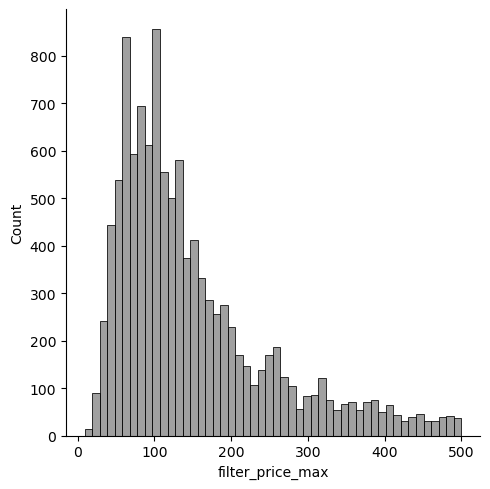

In [56]:
# Plotting the distribution of filter_price_max of df_searches above 500

df_searches_pricemaxbelow500=df_searches[df_searches['filter_price_max'] <= 500]

sns.displot(x=df_searches_pricemaxbelow500["filter_price_max"], color = 'grey')
plt.show()

So we can now see that most people tend to search for prices in the range surrounding 100.

## Studying the df_searches['prep_days_gap'] - the gap between the booking day and the checkin day

We can understand how early or late people tend to book. 

In [57]:
#Percentage of dataset beyond 50 days
prep_day_gap_df = df_searches['prep_days_gap'] / np.timedelta64(1, 'D')
print(len(prep_day_gap_df[prep_day_gap_df > 50])/len(prep_day_gap_df)*100, '% \n')

28.36390544066674 % 



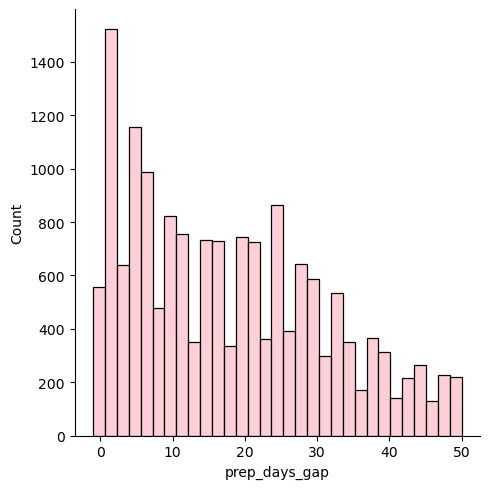

In [58]:
# Now we keep only the data points having the gap between the booking day and the checkin day of less than or equal to 50

prep_day_gap_df=prep_day_gap_df[prep_day_gap_df<=50]
sns.displot(x=prep_day_gap_df, color = 'pink')
plt.show()

## Finding out the nationalities of the searchers 


In [59]:
search_nationalities = df_searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_nationalities.columns = ['num_searches']

search_nationalities = search_nationalities.sort_values('num_searches', ascending = False) 
#displaying the top 10 nationalities of the searchers
search_nationalities.nlargest(10, 'num_searches')

,num_searches
origin_country,
US,4303
IE,4097
GB,3469
FR,2683
IT,1746
DE,1601
ES,1330
CA,774
AU,675


# Merged dataset analysis
We now merge the two datasets for further analysis 

In [60]:
merged = df_contacts.merge(df_searches, left_on='id_guest', right_on='id_user')

In [61]:
merged.columns

Index(['id_guest', 'id_host', 'id_listing', 'ts_contact_at', 'ts_reply_at',
       'ts_accepted_at', 'ts_booking_at', 'ds_checkin_x', 'ds_checkout_x',
       'n_guests', 'n_messages', 'req_accepted', 'month_x', 'ds', 'id_user',
       'ds_checkin_y', 'ds_checkout_y', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'prep_days_gap', 'month_y',
       'day_of_week', 'room_types_list', 'num_room_types'],
      dtype='object')

In [62]:
# let us find out the distribution of number of nights searched for accepted/rejected cases
# 
analy_df=merged[["n_nights","req_accepted"]]
analy_df=analy_df.dropna()

result = analy_df.groupby(["n_nights", "req_accepted"]).size().unstack(fill_value=0)

# Rename the columns for clarity
result = result.rename(columns={True: "accepted", False: "rejected"})

# Reset the index for a cleaner structure
result.reset_index(inplace=True)
result["accept_ratio"]=result["accepted"]*100/(result["accepted"]+result["rejected"])
print(result)

req_accepted  n_nights  rejected  accepted  accept_ratio
0                  0.0         3         3     50.000000
1                  1.0      1883      1363     41.990142
2                  2.0      2213      1914     46.377514
3                  3.0      2369      2015     45.962591
4                  4.0      1704      1286     43.010033
..                 ...       ...       ...           ...
115              245.0         4         2     33.333333
116              273.0         4         2     33.333333
117              334.0        73         9     10.975610
118              357.0         0         2    100.000000
119              366.0         4         2     33.333333

[120 rows x 4 columns]


req_accepted    rejected  accepted  accept_perc
origin_country                                 
US                  1835      1716    48.324416
GB                  1659      1283    43.609789
IT                  1676      1026    37.971873
FR                  1382      1221    46.907415
IE                  1440      1030    41.700405
ES                   892       612    40.691489
DE                   654       614    48.422713
CA                   464       326    41.265823
IN                   651       122    15.782665
AU                   270       219    44.785276
HR                   317       137    30.176211
BR                   242       180    42.654028
CH                   207       206    49.878935
NL                   203       179    46.858639
BE                   154       126    45.000000
SG                   105       100    48.780488
AT                   121        69    36.315789
PT                    85        85    50.000000
RU                   111        58    34

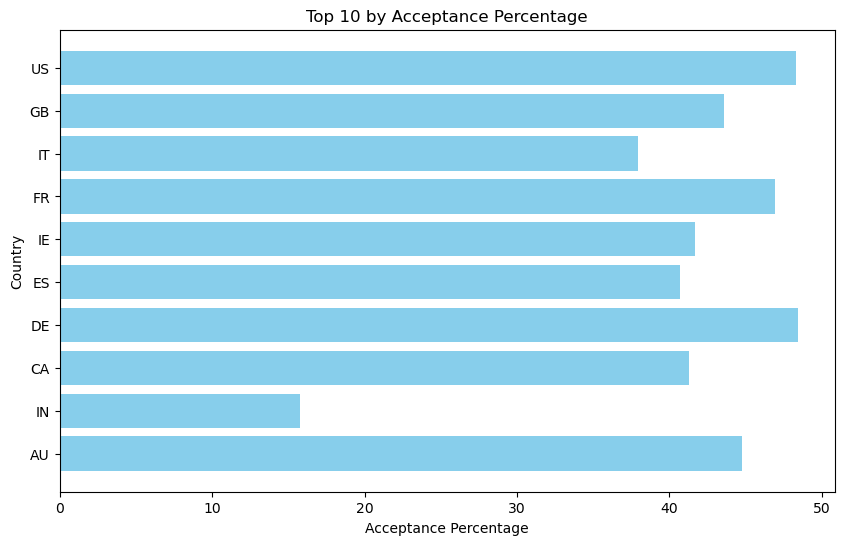

In [63]:
#let us find out the distribution of origin countries searched for accepted/rejected cases
# 
analy_df=merged[["origin_country","req_accepted"]]
analy_df=analy_df.dropna()

result = analy_df.groupby(["origin_country", "req_accepted"]).size().unstack(fill_value=0)

# Rename the columns for clarity
result = result.rename(columns={True: "accepted", False: "rejected"})

# Reset the index for a cleaner structure
result.reset_index(inplace=True)
result["accept_perc"]=result["accepted"]*100/(result["accepted"]+result["rejected"])
result=result.set_index("origin_country")
result["tot"]=result["accepted"]+result["rejected"]
result=result.sort_values(by=["tot","accept_perc"],ascending=[False, False])
result.drop("tot",axis=1,inplace=True)
top10=result.head(10)
print(result.head(20))# 

plt.figure(figsize=(10, 6))
plt.barh(top10.index, top10["accept_perc"], color='skyblue')
plt.xlabel("Acceptance Percentage")
plt.ylabel("Country")
plt.title("Top 10 by Acceptance Percentage")
plt.gca().invert_yaxis()  
plt.show()

In [64]:
result

req_accepted,rejected,accepted,accept_perc
origin_country,,,
US,1835,1716,48.324416
GB,1659,1283,43.609789
IT,1676,1026,37.971873
FR,1382,1221,46.907415
IE,1440,1030,41.700405
...,...,...,...
EE,0,1,100.000000
ET,0,1,100.000000
RE,0,1,100.000000
